#**Softmax Regression**

####**Môn học:** Thị giác máy tính nâng cao
####**Giảng viên:** TS. Nguyễn Vinh Tiệp
####**Lớp:** CS331.M21
####**Thành viên nhóm:**
| MSSV       | Họ và tên          |
|------------|--------------------|
| 19521388   | Hoàng Tiến Dũng    |
| 19522410   | Nguyễn Thành Trọng |



In [ ]:
# Import các thư viện, hàm cần thiết
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Tạo dữ liệu
## Tạo 4 cụm dữ liệu đầu vào
xlabel0 = np.random.normal(0, 1, (2,100))
xlabel1 = np.random.normal(5, 1, (2, 100))
xlabel2 = np.random.normal(0, 1, (2, 100)) + np.array([[0], [5]])
xlabel3 = np.random.normal(6, 2, (2, 100)) + np.array([[0], [-8]])

## Tạo label tương ứng cho 4 cụm dữ liệu trên
ylabel0 = np.zeros((1, 100), np.int8)
ylabel1 = np.ones((1, 100),np.int8)
ylabel2 = np.ones((1, 100), np.int8) * 2
ylabel3 = np.ones((1,100), np.int8) * 3

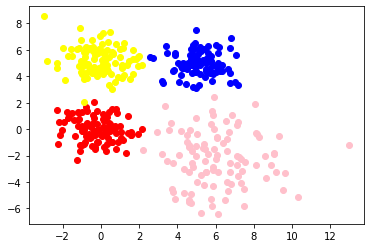

In [ ]:
# Visualize dữ liệu sau khi tạo
fig, ax = plt.subplots()
ax.scatter(xlabel0[0], xlabel0[1], color='red')
ax.scatter(xlabel1[0], xlabel1[1], color='blue')
ax.scatter(xlabel2[0], xlabel2[1], color='yellow')
ax.scatter(xlabel3[0], xlabel3[1], color='pink')
plt.show()

In [ ]:
# Kết hợp các dữ liệu đã tạo
X = np.concatenate((xlabel0, xlabel1, xlabel2, xlabel3), axis=1)
y = np.concatenate((ylabel0, ylabel1, ylabel2, ylabel3), axis=1)[0]

In [ ]:
print(f"Shape of X: {X.shape}\nShape of y: {y.shape}")

Shape of X: (2, 400)
Shape of y: (400,)


In [ ]:
# Chia bộ dữ liệu thành 2 bộ train và test với tỉ lệ 8:2
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.25, random_state=42)
X_train = X_train.T
X_test = X_test.T

In [ ]:
# One-hot encode cho y_train
y_train_hot = np.eye(4)[y_train]
y_train_hot = y_train_hot.T
print("Shape of y_train_hot:", y_train_hot.shape)

Shape of y_train_hot: (4, 300)


In [ ]:
class Softmax():
  """Implement Softmax Regression."""
  def __init__(self):
    pass

  def softmax(self, z):
    """Cài đặt hàm softmax."""
    s = np.sum(np.exp(z), axis=0, keepdims=True) # Tính tổng của các lũy thừa cơ số e
    return np.exp(z)/s # Lấy lũy thừa cơ số e của mỗi phần tử chia cho tổng trên
  
  def cost_function(self, X, y, theta):
    """Cài đặt hàm mất mát."""
    m = len(X[0])
    y_pred = self.softmax(np.dot(theta.T, X)) # Tính y_pred 
    cost = -1.0 * np.mean(np.sum(y * np.log(y_pred), axis = 0)) # Tính trung bình của cross entropy mỗi record
    return cost
  
  def batch_gradient_descent(self, X, y, theta, iters, alpha):
    """Cập nhật theta bằng batch gradient descent."""
    m = len(X[0])
    costs = [] # Mảng costs dùng để lưu cost sau mỗi iter
    for i in range(iters):
      y_pred = self.softmax(np.dot(theta.T,X)) # Tính y_pred
      dtheta = np.dot(X, (y_pred - y).T) # Tính đạo hàm của theta theo hàm loss
      theta -= alpha * 1.0 / m * dtheta # Cập nhật theta
      cost = self.cost_function(X=X, y=y, theta=theta) # Tính và lưu cost sau mỗi iter
      costs.append(cost)
      if (i+1) % 10 == 0 or (i+1) == iters: # Cứ sau 10 iter hoặc iter cuối thì in cost ra
        print(f"Iteration: {i+1} --- cost: {cost}")
    return theta, costs

  def fit(self, X, y, iters = 15, learning_rate=0.01):
    """Thực hiện huấn luyện mô hình."""
    m = len(X[0])
    n = len(X) # shape X = n x m
    c = len(y) # shape y = c x m
    self.X = X
    self.y = y
    self.iters = iters
    self.X_train = np.append(np.ones((1, m)), X, axis=0) # Thêm hệ số bias cho X_train, shape X_train = (n+1) x m
    self.y_train = self.y # shape y_train = c x m
    self.theta = np.zeros((n + 1, c)) # Tạo theta gồm các phần tử bằng 0 có shape = (n+1) x c
    # Cập nhật và trả về theta, costs
    self.theta, self.costs = self.batch_gradient_descent(self.X_train, self.y_train, self.theta, iters=iters, alpha=learning_rate)
    return self.theta, self.costs

  def visual_cost(self):
    """Visual loss qua từng iter với matplotlib."""
    fig, ax = plt.subplots()
    ax.plot(range(self.iters), self.costs)
    ax.set(title='Costs', xlabel= 'Iteration', ylabel='Cost')
    plt.show()

  def predict(self, X_pred, one_hot_decode=False):
    """Dự đoán với mô hình đã được huấn luyện."""
    m = len(X_pred[0])
    n = len(self.X)
    if n != len(X_pred): # Kiểm tra chiều của X_pred có cùng chiều với X không
      print("Check your test data!")
      return
    X_pred_add_one = np.append(np.ones((1, m)), X_pred, axis=0) # Thêm hệ số bias của X_pred
    y_pred_hot = np.dot(self.theta.T, X_pred_add_one) # Dự đoán
    if one_hot_decode==True: # One-hot decode nếu muốn
      y_pred = np.argmax(y_pred_hot, axis=0)
      return y_pred
    return y_pred_hot

In [ ]:
# Khởi tạo mô hình Softmax
sm = Softmax()

In [ ]:
# Huấn luyện mô hình với iters=1000, learning_rate=0.01
theta, costs = sm.fit(X_train, y_train_hot, 1000, 0.01)

Iteration: 10 --- cost: 1.0338701490587918
Iteration: 20 --- cost: 0.8646573079287585
Iteration: 30 --- cost: 0.7672085887592055
Iteration: 40 --- cost: 0.7027779375122046
Iteration: 50 --- cost: 0.6562617278461007
Iteration: 60 --- cost: 0.62065636372481
Iteration: 70 --- cost: 0.5922393583953717
Iteration: 80 --- cost: 0.568832171121669
Iteration: 90 --- cost: 0.5490681574900592
Iteration: 100 --- cost: 0.5320437315077536
Iteration: 110 --- cost: 0.5171361933177318
Iteration: 120 --- cost: 0.50390172833482
Iteration: 130 --- cost: 0.4920150613058082
Iteration: 140 --- cost: 0.4812321112426171
Iteration: 150 --- cost: 0.4713659939191512
Iteration: 160 --- cost: 0.46227109929537247
Iteration: 170 --- cost: 0.4538322307486976
Iteration: 180 --- cost: 0.4459570163904253
Iteration: 190 --- cost: 0.43857049319019475
Iteration: 200 --- cost: 0.4316111685803499
Iteration: 210 --- cost: 0.42502810813887076
Iteration: 220 --- cost: 0.4187787494351235
Iteration: 230 --- cost: 0.4128272385860624

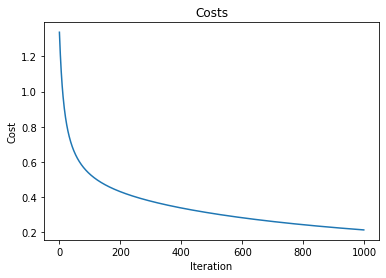

In [ ]:
# Visual cost của mô hình sau mỗi iter
sm.visual_cost()

In [ ]:
# Predict X_test
y_pred = sm.predict(X_test, one_hot_decode=True)

In [ ]:
y_pred

array([2, 2, 0, 2, 0, 0, 3, 3, 2, 1, 2, 3, 2, 2, 1, 0, 2, 3, 2, 3, 0, 0,
       3, 2, 3, 3, 1, 2, 2, 1, 3, 1, 2, 0, 2, 1, 1, 3, 1, 1, 3, 2, 0, 0,
       0, 3, 1, 1, 0, 1, 0, 3, 3, 0, 3, 2, 2, 1, 0, 1, 1, 2, 2, 3, 1, 0,
       3, 2, 3, 0, 3, 1, 0, 2, 3, 2, 2, 3, 1, 2, 0, 3, 2, 2, 2, 0, 2, 3,
       1, 0, 2, 3, 1, 2, 1, 3, 3, 3, 2, 0])

In [ ]:
print("Độ chính xác mô hình qua X_test là:", accuracy_score(y_test, y_pred))

Độ chính xác mô hình qua X_test là: 0.9


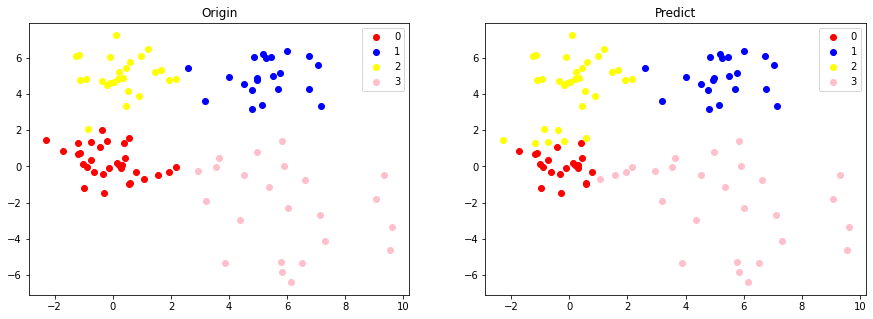

In [ ]:
# Visual kết quả sau khi predict
zero0 = np.where(y_test==0)[0]
one1 = np.where(y_test==1)[0]
two2 = np.where(y_test==2)[0]
three3 = np.where(y_test==3)[0]
zero0_pred = np.where(y_pred==0)[0]
one1_pred = np.where(y_pred==1)[0]
two2_pred = np.where(y_pred==2)[0]
three3_pred = np.where(y_pred==3)[0]

fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
ax1.scatter(X_test[0][zero0], X_test[1][zero0], color='red', label="0")
ax1.scatter(X_test[0][one1], X_test[1][one1], color='blue', label="1")
ax1.scatter(X_test[0][two2], X_test[1][two2], color='yellow', label="2")
ax1.scatter(X_test[0][three3], X_test[1][three3], color='pink', label="3")
ax1.set(title="Origin")
ax1.legend()

ax2.scatter(X_test[0][zero0_pred], X_test[1][zero0_pred], color='red', label="0")
ax2.scatter(X_test[0][one1_pred], X_test[1][one1_pred], color='blue', label="1")
ax2.scatter(X_test[0][two2_pred], X_test[1][two2_pred], color='yellow', label="2")
ax2.scatter(X_test[0][three3_pred], X_test[1][three3_pred], color='pink', label="3")
ax2.set(title="Predict")
ax2.legend()

plt.show()